In [153]:
import pandas as pd

In [154]:
df = pd.read_csv("/Users/utsahpradhan/Desktop/DA_DS/Titanic_Dataset.csv")
# display(df)

# printing details
# print("Rows and Columns:" , df.shape)
# print("Column Names:" , df.columns.to_list())

# print(df.info)
# print(df.describe)
# print("Duplicate Sum:", df.duplicated().sum()) #checking duplicate values
# print(df.dtypes)
# print(df.head)

In [155]:
df.rename(columns={'PassengerId':'passenger_id', 
                   'Survived':'survived', 
                   'Pclass':'ticket_class', 
                   'Name':'name', 
                   'Sex':'sex', 
                   'Age':'age', 
                   'SibSp':'siblings_spouses', 
                   'Parch':'parents_children', 
                   'Ticket':'ticket', 
                   'Fare':'fare', 
                   'Cabin':'cabin', 
                   'Embarked':'embarked_port'}, inplace = True)
# display(df)
# print(df['survived'].unique())
# print(df['survived'].dtype)
print(df.dtypes)


passenger_id          int64
survived              int64
ticket_class          int64
name                 object
sex                  object
age                 float64
siblings_spouses      int64
parents_children      int64
ticket               object
fare                float64
cabin                object
embarked_port        object
dtype: object


In [156]:
#does not work if you try to put yes or no instead of for better readibillity 
#as there are some spaces which results the value to be nan 
#so we convert it to string first and use strip to remove and spaces
##---------------------does not work----------------------
# df['survived'] = df['survived'].map({0:'no', 1:'yes'})
# display(df.dtypes)

df['survived'] = (df['survived'].astype(str).str.strip().map({'0':'no', '1':'yes'}))
display(df.head(10))

,passenger_id,survived,ticket_class,name,sex,age,siblings_spouses,parents_children,ticket,fare,cabin,embarked_port
0,1,no,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,no,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,no,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,no,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,no,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,yes,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [157]:
#switching back to int for ML
df['survived'] = df['survived'].map({'no':0 ,'yes':1})

#displaying just first 10 rows
display(df.head(10))


,passenger_id,survived,ticket_class,name,sex,age,siblings_spouses,parents_children,ticket,fare,cabin,embarked_port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [158]:
#getting just 1 column data type
print(df['survived'].dtype)


int64


In [176]:
#day 3
#both does the same things an are alias
#df.isna().sum()

print('Null values sum: \n' , df.isnull().sum()) #showing null values for each columns

Null values sum: 
 passenger_id          0
survived              0
ticket_class          0
name                  0
sex                   0
age                 177
siblings_spouses      0
parents_children      0
ticket                0
fare                  0
cabin               687
embarked_port         2
dtype: int64


In [160]:
#details of columns
df.describe(include='all')


,passenger_id,survived,ticket_class,name,sex,age,siblings_spouses,parents_children,ticket,fare,cabin,embarked_port
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [213]:
#When normalize is false it shows exact number and when it is true it shows in percentage/fraction
df.groupby('sex')['survived'].value_counts(normalize=False)

sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [178]:
df.groupby('sex')['survived'].value_counts(normalize=True)

sex     survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

In [164]:
df.groupby('ticket_class')['survived'].value_counts(normalize=False)

ticket_class  survived
1             1           136
              0            80
2             0            97
              1            87
3             0           372
              1           119
Name: count, dtype: int64

In [181]:
df.groupby('ticket_class')['survived'].value_counts(normalize=True)

ticket_class  survived
1             1           0.629630
              0           0.370370
2             0           0.527174
              1           0.472826
3             0           0.757637
              1           0.242363
Name: proportion, dtype: float64

In [212]:
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [217]:
df.groupby('sex')['survived'].value_counts(normalize=False)


sex     survived
female  1           233
        0            81
male    0           468
        1           109
Name: count, dtype: int64

In [184]:
#dropping column cabin as there is too many null values
df.drop(columns=['cabin'], inplace=True)

In [195]:
#filling null values for age with median age
df['age'] = df['age'].fillna(df['age'].median())


In [196]:
#showing age is filled
df.isnull().sum()

passenger_id        0
survived            0
ticket_class        0
name                0
sex                 0
age                 0
siblings_spouses    0
parents_children    0
ticket              0
fare                0
embarked_port       2
dtype: int64

In [198]:
df['embarked_port'] = df['embarked_port'].fillna(df['embarked_port'].mode()[0])

In [199]:
#showing embarked port is filled with mode
df.isnull().sum()

passenger_id        0
survived            0
ticket_class        0
name                0
sex                 0
age                 0
siblings_spouses    0
parents_children    0
ticket              0
fare                0
embarked_port       0
dtype: int64

In [206]:
df['embarked_port'] = df['embarked_port'].map({"S":1, "C":2, "Q":3})

In [207]:
display(df)

,passenger_id,survived,ticket_class,name,sex,age,siblings_spouses,parents_children,ticket,fare,embarked_port
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,2


In [209]:
# Check survival by gender
df.groupby('sex')['survived'].value_counts(normalize=True)

sex     survived
female  1           0.742038
        0           0.257962
male    0           0.811092
        1           0.188908
Name: proportion, dtype: float64

In [210]:
# Check survival by ticket class
df.groupby('ticket_class')['survived'].value_counts(normalize=True)

ticket_class  survived
1             1           0.629630
              0           0.370370
2             0           0.527174
              1           0.472826
3             0           0.757637
              1           0.242363
Name: proportion, dtype: float64

In [211]:
# Quick counts
df['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

<Axes: title={'center': 'Survival Count'}, xlabel='survived'>

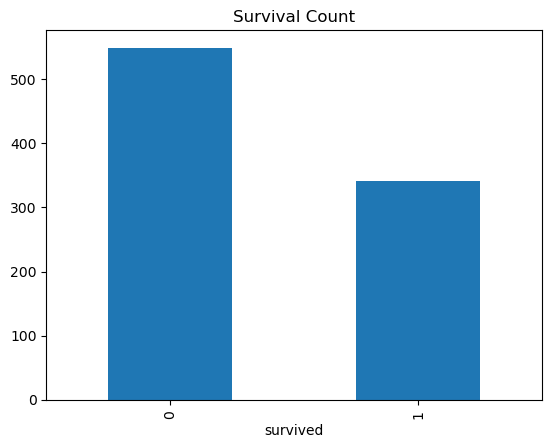

In [218]:
#Survival Count
df['survived'].value_counts().plot(kind='bar', title = "Survival Count")

<Axes: title={'center': 'Age Distribution'}, ylabel='Frequency'>

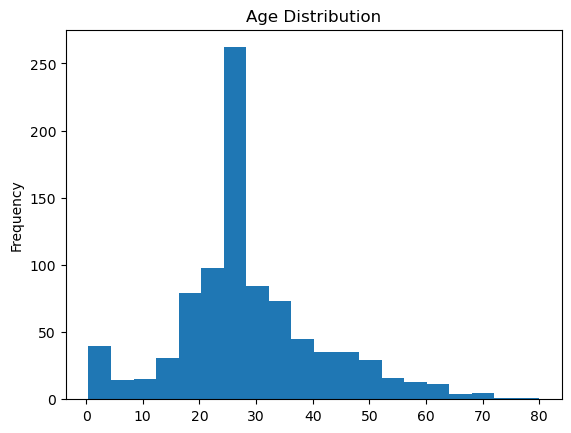

In [222]:
df['age'].plot(kind='hist', bins=20, title="Age Distribution")